<a href="https://colab.research.google.com/github/raulbenitez/Computer_Vision_IP/blob/main/Lab_session_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Exercise: Object segmentation using k-means clustering 

- step 1: Load an Image and visualize
- step 2: Convert to RGB
- step 3: Reshape image matrix as 1d array
- step 4 (exercise): Apply k-means  
- step 5 (exercise): Reshape result back as a matrix and visualize
- Step 6 (exercise): Compare k-means (k=2) and Otsu segmentation

Step 1: Load image and visualize

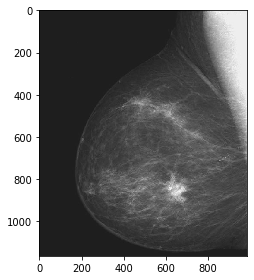

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io 
IC = sk.io.imread('image1.tif') # read image using imread function
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 

Step 2: Convert to grayscale

In [ ]:
IG = sk.color.rgb2gray(IC)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


Step 3: Reshape image as 1d array

In [ ]:
# reshape the image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)
v.shape

(1145376, 1)

Step 4 (exercise):

Step 5 (exercise): 

Step 6 (exercise): Compare k-means result with k=2 with Otsu segmentation

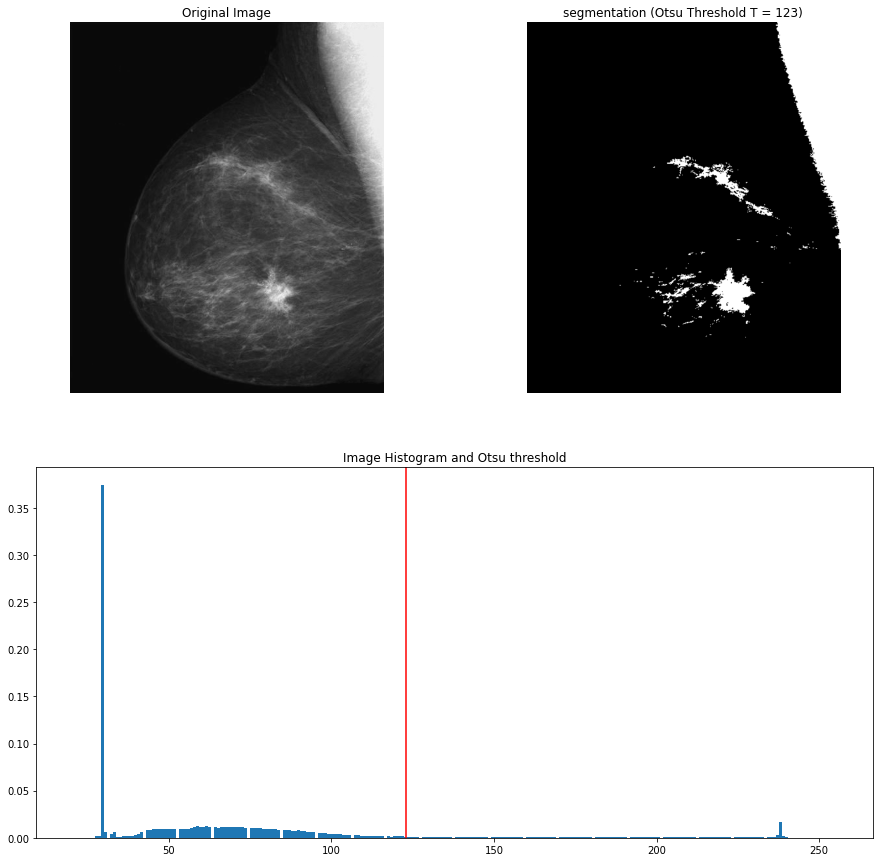

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.filters import threshold_otsu

# Find Otsu's threshold for training image:
threshold_otsu = threshold_otsu(IG)

# Apply threshold to test image:
I_otsu = IG >= threshold_otsu

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_otsu, cmap=plt.cm.gray)
ax2.set_title('segmentation (Otsu Threshold T = {})'.format(threshold_otsu))
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[1,:])
ax3.hist(IG.ravel(), bins=256,density=True)
ax3.axvline(threshold_otsu, color='r')
ax3.set_title('Image Histogram and Otsu threshold')
plt.show()

# The k-means algorithm:


[1] Specify the number of clusters $k$ to be found in data.

[2] Set initial values for the cluster centroids $\mu^0_1,\dots,\mu^0_k$ (at random or prior knowledge). 

[3] Assign each observation to the nearest cluster (euclidean distance).

[4] Recompute the centroid of each cluster from the assigned observations $\mu^1_1,\dots,\mu^1_k$.

[5] Repeat steps 3-4 until no change in the centroids. Provide final clustering $\mu^n_1,\dots,\mu^n_k$, where $n$ is the number of iterations. 


### Introductory Example

k-means with few observations

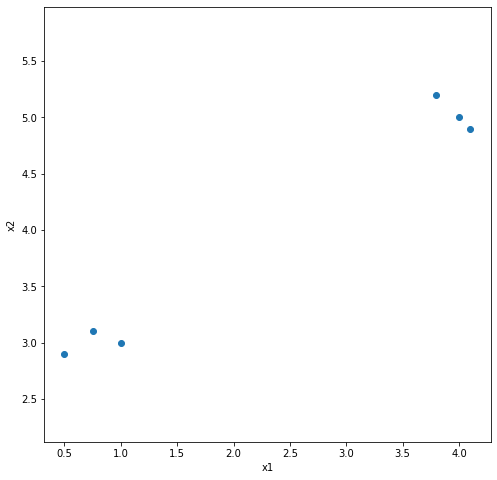

In [ ]:
import numpy as np
import matplotlib.pylab as plt
D = np.array([[1,3],[3.8,5.2],[0.5,2.9],[0.75,3.1],[4,5],[4.1,4.9]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D[:,0],D[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(D)
print(group)

[0 1 0 0 1 1]


In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(D,columns=['x','y'])
df['kmeans']=group

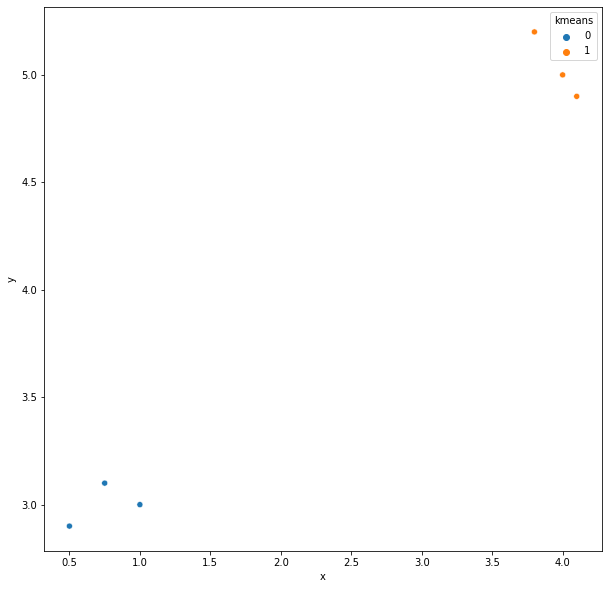

In [ ]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

NOTE: If we want to know more details about the clusters found, use the fit function and not fit_predict (the latter returns only the labels for assigning the observations to clusters, that is, the prediction of the k-means algorithm). Variables detail can be found at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
kmeans_result = KMeans(n_clusters=2).fit(D)
print('Cluster labels {}'.format(kmeans_result.labels_))
print('Cluster centroids {}'.format(kmeans_result.cluster_centers_))
print('Number of iterations required {}'.format(kmeans_result.n_iter_))

Cluster labels [1 0 1 1 0 0]
Cluster centroids [[3.96666667 5.03333333]
 [0.75       3.        ]]
Number of iterations required 2
